In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
plt.style.use('ggplot')

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
SALES_DATA=pd.read_csv('SALES_DATA.csv')

In [5]:
SALES_DATA.info()
SALES_DATA.head(10)
SALES_DATA.columns

# There is no missing value 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566309 entries, 0 to 566308
Data columns (total 18 columns):
InvoiceNo           566309 non-null object
StockCode           566309 non-null object
Quantity Shipped    566309 non-null float64
Year                566309 non-null int64
Invoice Date        566309 non-null object
UnitPrice           566309 non-null float64
Ext-Price           566309 non-null float64
CustomerID          566309 non-null int64
Country             566309 non-null object
GM%                 566309 non-null float64
Shipper             566309 non-null object
COST                566309 non-null float64
EXT COST            566309 non-null float64
REGION              566309 non-null object
SALES P             566309 non-null object
Product             566309 non-null object
Month               566309 non-null object
Weekday             566309 non-null object
dtypes: float64(6), int64(2), object(10)
memory usage: 77.8+ MB


,InvoiceNo,StockCode,Quantity Shipped,Year,Invoice Date,UnitPrice,Ext-Price,CustomerID,Country,GM%,Shipper,COST,EXT COST,REGION,SALES P,Product,Month,Weekday
0,568200,PADS,5.000,2017,9/25/2017,0.999975,4.999876,16198,United Kingdom,0.000023,Delivery Truck,0.999953,4.999763,SOUTH,GRACE J,Studs,9,2
1,568375,BANK CHARGES,5.000,2017,9/26/2017,0.999976,4.999883,13405,United Kingdom,1.000000,UPS Next day Air,0.000000,0.000000,WEST,JEFF Y,Studs,9,3
2,561226,PADS,5.000,2017,7/26/2017,0.999886,4.999428,15618,United Kingdom,-0.000067,Delivery Truck,0.999953,4.999763,SOUTH,GRACE J,Studs,7,4
3,2550193,PADS,7.080,2018,6/8/2018,0.999962,7.079728,13952,United Kingdom,0.000009,UPS ground 2nd day,0.999953,7.079664,CENTRAL,PETER T,Studs,6,6
4,550193,PADS,5.000,2017,4/15/2017,0.999988,4.999940,13952,United Kingdom,0.000035,UPS ground 2nd day,0.999953,4.999763,CENTRAL,PETER T,Studs,4,7
5,561047,16045,1.075,2017,7/24/2017,1.003816,1.079102,16948,United Kingdom,-0.001392,UPS ground 2nd day,1.005214,1.080605,WEST,JEFF Y,Bolt,7,2
6,560259,16045,6.450,2017,7/17/2017,1.007168,6.496234,13654,United Kingdom,0.001941,UPS Next day Air,1.005214,6.483628,CENTRAL,GAIL H,Bolt,7,2
7,2558389,16045,46.956,2018,7/9/2018,1.000832,46.995067,14383,United Kingdom,-0.004378,UPS Next day Air,1.005214,47.200809,SOUTH,GRACE J,Bolt,7,2
8,558389,16045,3.225,2017,6/29/2017,1.012288,3.264629,14383,United Kingdom,0.006989,UPS Next day Air,1.005214,3.241814,SOUTH,GRACE J,Bolt,6,5
9,C536757,84347,2.000,2016,12/2/2016,1.002964,2.005928,15838,United Kingdom,0.240951,UPS ground 2nd day,0.761299,1.522598,NORTH,JOHN A,Screw,12,6


Index(['InvoiceNo', 'StockCode', 'Quantity Shipped', 'Year', 'Invoice Date',
       'UnitPrice', 'Ext-Price', 'CustomerID', 'Country', 'GM%', 'Shipper',
       'COST', 'EXT COST', 'REGION', 'SALES P', 'Product', 'Month', 'Weekday'],
      dtype='object')

In [6]:
SALES_DATA=SALES_DATA[SALES_DATA['Invoice Date']!='2/29/2018']

SALES_DATA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 566076 entries, 0 to 566308
Data columns (total 18 columns):
InvoiceNo           566076 non-null object
StockCode           566076 non-null object
Quantity Shipped    566076 non-null float64
Year                566076 non-null int64
Invoice Date        566076 non-null object
UnitPrice           566076 non-null float64
Ext-Price           566076 non-null float64
CustomerID          566076 non-null int64
Country             566076 non-null object
GM%                 566076 non-null float64
Shipper             566076 non-null object
COST                566076 non-null float64
EXT COST            566076 non-null float64
REGION              566076 non-null object
SALES P             566076 non-null object
Product             566076 non-null object
Month               566076 non-null object
Weekday             566076 non-null object
dtypes: float64(6), int64(2), object(10)
memory usage: 82.1+ MB


In [7]:
SALES_DATA['Invoice Date'] = pd.to_datetime(SALES_DATA['Invoice Date'])

lat_date=SALES_DATA['Invoice Date'].max()
print('The latest invoice date is:', lat_date)
ear_date=SALES_DATA['Invoice Date'].min()
print('The earliest invoice date is:', ear_date)

The latest invoice date is: 2018-12-27 00:00:00
The earliest invoice date is: 2016-12-01 00:00:00


In [8]:
cust=SALES_DATA[['CustomerID']].drop_duplicates()
print("No of customers are:", len(cust))

grou=SALES_DATA[['Product']].drop_duplicates()
print("No of product groups are:", len(grou))

prod=SALES_DATA[['StockCode']].drop_duplicates()
print("No of products are:", len(prod))

No of customers are: 4146
No of product groups are: 5
No of products are: 3902


In [9]:
coun=SALES_DATA['Country'].drop_duplicates()
print("No of countires are:", len(coun))

SALES_DATA['Country'].unique()

No of countires are: 38


array(['United Kingdom', 'EIRE', 'Germany', 'France', 'Israel', 'Austria',
       'Norway', 'Finland', 'Spain', 'Belgium', 'Switzerland', 'Portugal',
       'Netherlands', 'Singapore', 'Japan', 'Sweden', 'Malta', 'Greece',
       'Hong Kong', 'Unspecified', 'Cyprus', 'Canada',
       'United Arab Emirates', 'Australia', 'Italy', 'Channel Islands',
       'Denmark', 'USA', 'Poland', 'Iceland', 'Czech Republic', 'RSA',
       'European Community', 'Lebanon', 'Saudi Arabia', 'Lithuania',
       'Bahrain', 'Brazil'], dtype=object)

In [10]:
# Checking country wise customer distribution:

In [10]:
cust_country=SALES_DATA[['Country','CustomerID']].drop_duplicates()

cust_country_count=cust_country.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID',ascending=False)
cust_country_count

,Country,CustomerID
36,United Kingdom,3753
14,Germany,91
13,France,88
10,EIRE,31
31,Spain,30
3,Belgium,24
33,Switzerland,22
27,Portugal,18
19,Italy,13
12,Finland,11


<Figure size 864x576 with 0 Axes>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]), <a list of 38 Text xticklabel objects>)

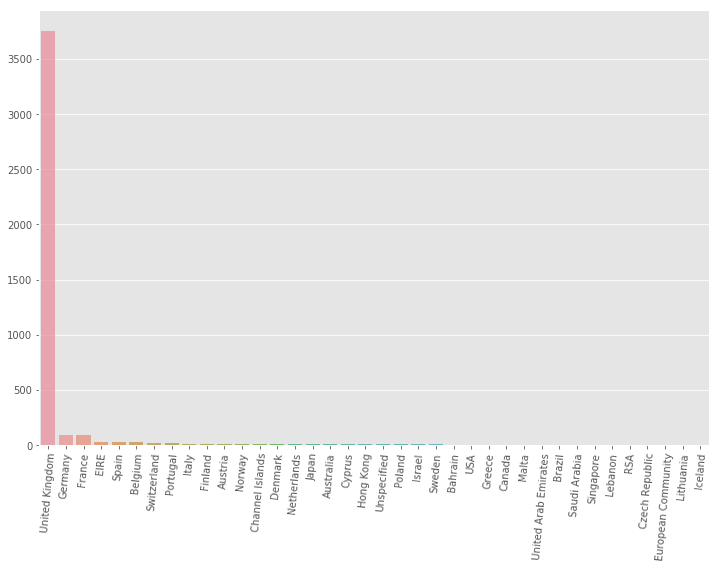

In [11]:
country=list(cust_country_count['Country'])
cust_id=list(cust_country_count['CustomerID'])
plt.figure(figsize=(12,8))
sns.barplot(country, cust_id, alpha=0.8)
plt.xticks(rotation='85')

# It can be seen from the graph that around 90% of the customers exist in United Kingdom only followed by Germany and France. 
# Hence, the company should focus on the United Kingdom for it marketing and other strategies.

In [13]:
# Recency (R): 

In [12]:
cust_date=SALES_DATA[['CustomerID','Invoice Date']].drop_duplicates()

cust_date.info()
cust_date.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114787 entries, 0 to 566306
Data columns (total 2 columns):
CustomerID      114787 non-null int64
Invoice Date    114787 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.6 MB


,CustomerID,Invoice Date
0,16198,2017-09-25
1,13405,2017-09-26
2,15618,2017-07-26
3,13952,2018-06-08
4,13952,2017-04-15


(array([ 2560.,  2651.,  3041.,  3110.,  4531.,  6191., 21075., 33887.,
        27104., 10637.]),
 array([736299. , 736374.6, 736450.2, 736525.8, 736601.4, 736677. ,
        736752.6, 736828.2, 736903.8, 736979.4, 737055. ]),
 <a list of 10 Patch objects>)

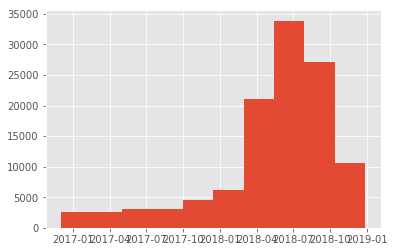

In [13]:
plt.hist(cust_date['Invoice Date'])
plt.show()

In [14]:
import datetime as dt

NOW=dt.datetime(2018,12,27)

In [15]:
cust_rece=SALES_DATA.groupby('CustomerID').agg({'Invoice Date': lambda x: (NOW - x.max()).days})

cust_rece.info()
cust_rece.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4146 entries, 12346 to 18287
Data columns (total 1 columns):
Invoice Date    4146 non-null int64
dtypes: int64(1)
memory usage: 64.8 KB


,Invoice Date
CustomerID,
12346,232
12347,21
12348,12
12349,401
12350,148


(array([1.142e+03, 4.800e+02, 4.900e+02, 1.770e+02, 2.260e+02, 5.200e+01,
        1.300e+01, 8.000e+00, 4.000e+00, 0.000e+00, 6.010e+02, 3.870e+02,
        2.100e+02, 1.360e+02, 5.800e+01, 5.900e+01, 1.000e+00, 6.600e+01,
        9.000e+00, 2.700e+01]),
 array([  0.  ,  37.75,  75.5 , 113.25, 151.  , 188.75, 226.5 , 264.25,
        302.  , 339.75, 377.5 , 415.25, 453.  , 490.75, 528.5 , 566.25,
        604.  , 641.75, 679.5 , 717.25, 755.  ]),
 <a list of 20 Patch objects>)

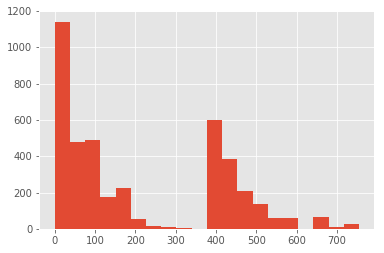

In [188]:
plt.hist(cust_rece['Invoice Date'],20)
plt.show()

In [20]:
# Frequency (F):

In [17]:
cust_freq=SALES_DATA[['Country','InvoiceNo','CustomerID']].drop_duplicates()

cust_freq_count=cust_freq.groupby(['CustomerID','Country']).aggregate('count').reset_index().sort_values(by='InvoiceNo', ascending=False)

cust_freq.head()
cust_freq_count.head(10)
cust_freq_count.info()

# Note that there are 4209 observations, more than total number of customers (4146). The reason might be that some customers have
# multiple locations in difference countries. 

,Country,InvoiceNo,CustomerID
0,United Kingdom,568200,16198
1,United Kingdom,568375,13405
2,United Kingdom,561226,15618
3,United Kingdom,2550193,13952
4,United Kingdom,550193,13952


,CustomerID,Country,InvoiceNo
326,12748,United Kingdom,250
1841,14911,EIRE,241
3892,17841,United Kingdom,180
1627,14606,United Kingdom,157
2125,15311,United Kingdom,144
552,13089,United Kingdom,139
475,12971,United Kingdom,110
777,13408,United Kingdom,102
1656,14646,Netherlands,91
1570,14527,United Kingdom,89


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4209 entries, 326 to 3146
Data columns (total 3 columns):
CustomerID    4209 non-null int64
Country       4209 non-null object
InvoiceNo     4209 non-null int64
dtypes: int64(2), object(1)
memory usage: 131.5+ KB


(array([3.638e+03, 3.680e+02, 1.030e+02, 4.700e+01, 2.400e+01, 8.000e+00,
        7.000e+00, 1.000e+00, 4.000e+00, 1.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00]),
 array([  1.  ,  10.96,  20.92,  30.88,  40.84,  50.8 ,  60.76,  70.72,
         80.68,  90.64, 100.6 , 110.56, 120.52, 130.48, 140.44, 150.4 ,
        160.36, 170.32, 180.28, 190.24, 200.2 , 210.16, 220.12, 230.08,
        240.04, 250.  ]),
 <a list of 25 Patch objects>)

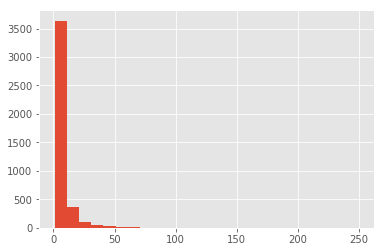

In [186]:
plt.hist(cust_freq_count['InvoiceNo'],25)
plt.show()

# Most customers purchased less than 50/100 times with the company

In [31]:
# Monetary Value (M):

In [19]:
cust_sale=SALES_DATA.groupby(['Country','CustomerID'])['Ext-Price'].aggregate('sum').reset_index().sort_values(by='Ext-Price', ascending=False)

cust_sale.info()
cust_sale.head(10)

# look at the total sales first

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4209 entries, 347 to 83
Data columns (total 3 columns):
Country       4209 non-null object
CustomerID    4209 non-null int64
Ext-Price     4209 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 131.5+ KB


,Country,CustomerID,Ext-Price
347,Netherlands,14646,992688.313263
449,United Kingdom,12346,750867.968067
680,United Kingdom,13145,668776.912578
87,EIRE,14911,588004.332649
2004,United Kingdom,15098,560009.353472
3,Australia,12415,526458.045951
2777,United Kingdom,16203,488238.834123
2658,United Kingdom,16029,481665.080219
2053,United Kingdom,15159,470630.115799
4069,United Kingdom,18102,450669.391283


In [20]:
SALES_DATA['Profit']=SALES_DATA['Ext-Price']-SALES_DATA['EXT COST']

SALES_DATA.head(10)

,InvoiceNo,StockCode,Quantity Shipped,Year,Invoice Date,UnitPrice,Ext-Price,CustomerID,Country,GM%,Shipper,COST,EXT COST,REGION,SALES P,Product,Month,Weekday,Profit
0,568200,PADS,5.000,2017,2017-09-25,0.999975,4.999876,16198,United Kingdom,0.000023,Delivery Truck,0.999953,4.999763,SOUTH,GRACE J,Studs,9,2,0.000113
1,568375,BANK CHARGES,5.000,2017,2017-09-26,0.999976,4.999883,13405,United Kingdom,1.000000,UPS Next day Air,0.000000,0.000000,WEST,JEFF Y,Studs,9,3,4.999883
2,561226,PADS,5.000,2017,2017-07-26,0.999886,4.999428,15618,United Kingdom,-0.000067,Delivery Truck,0.999953,4.999763,SOUTH,GRACE J,Studs,7,4,-0.000335
3,2550193,PADS,7.080,2018,2018-06-08,0.999962,7.079728,13952,United Kingdom,0.000009,UPS ground 2nd day,0.999953,7.079664,CENTRAL,PETER T,Studs,6,6,0.000064
4,550193,PADS,5.000,2017,2017-04-15,0.999988,4.999940,13952,United Kingdom,0.000035,UPS ground 2nd day,0.999953,4.999763,CENTRAL,PETER T,Studs,4,7,0.000177
5,561047,16045,1.075,2017,2017-07-24,1.003816,1.079102,16948,United Kingdom,-0.001392,UPS ground 2nd day,1.005214,1.080605,WEST,JEFF Y,Bolt,7,2,-0.001502
6,560259,16045,6.450,2017,2017-07-17,1.007168,6.496234,13654,United Kingdom,0.001941,UPS Next day Air,1.005214,6.483628,CENTRAL,GAIL H,Bolt,7,2,0.012606
7,2558389,16045,46.956,2018,2018-07-09,1.000832,46.995067,14383,United Kingdom,-0.004378,UPS Next day Air,1.005214,47.200809,SOUTH,GRACE J,Bolt,7,2,-0.205741
8,558389,16045,3.225,2017,2017-06-29,1.012288,3.264629,14383,United Kingdom,0.006989,UPS Next day Air,1.005214,3.241814,SOUTH,GRACE J,Bolt,6,5,0.022815
9,C536757,84347,2.000,2016,2016-12-02,1.002964,2.005928,15838,United Kingdom,0.240951,UPS ground 2nd day,0.761299,1.522598,NORTH,JOHN A,Screw,12,6,0.483330


In [21]:
cust_mone=SALES_DATA[['CustomerID','Ext-Price','Profit']]

cust_mone.info()
cust_mone.head(10)

# then look at profit

<class 'pandas.core.frame.DataFrame'>
Int64Index: 566076 entries, 0 to 566308
Data columns (total 3 columns):
CustomerID    566076 non-null int64
Ext-Price     566076 non-null float64
Profit        566076 non-null float64
dtypes: float64(2), int64(1)
memory usage: 17.3 MB


,CustomerID,Ext-Price,Profit
0,16198,4.999876,0.000113
1,13405,4.999883,4.999883
2,15618,4.999428,-0.000335
3,13952,7.079728,0.000064
4,13952,4.999940,0.000177
5,16948,1.079102,-0.001502
6,13654,6.496234,0.012606
7,14383,46.995067,-0.205741
8,14383,3.264629,0.022815
9,15838,2.005928,0.483330


In [22]:
cust_mone=cust_mone.groupby(['CustomerID']).aggregate('sum').sort_values('Ext-Price', ascending=False)

cust_mone.info()
cust_mone.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4146 entries, 14646 to 14682
Data columns (total 2 columns):
Ext-Price    4146 non-null float64
Profit       4146 non-null float64
dtypes: float64(2)
memory usage: 97.2 KB


,Ext-Price,Profit
CustomerID,,
14646,992688.313263,25293.246437
12346,750867.968067,-104578.698237
13145,668776.912578,454810.708393
14911,588004.332649,117925.862954
15098,560009.353472,552235.860225
12415,526458.045951,26248.435558
16203,488965.642323,142340.923354
16029,481706.091313,41018.307218
15159,470630.115799,244259.782182


In [23]:
cust_mone=cust_mone.sort_values('Profit', ascending=False)

cust_mone.head(10)

,Ext-Price,Profit
CustomerID,,
15098,560009.353472,552235.860225
13145,668776.912578,454810.708393
15159,470630.115799,244259.782182
14030,359405.133077,174175.515476
17450,443791.644060,162238.562309
16203,488965.642323,142340.923354
14911,588004.332649,117925.862954
17377,283705.317805,102633.144128
16003,274445.548919,98778.640364


(array([3.974e+03, 8.700e+01, 3.800e+01, 1.300e+01, 1.100e+01, 7.000e+00,
        2.000e+00, 3.000e+00, 1.000e+00, 4.000e+00, 1.000e+00, 2.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([1.01651000e+00, 4.96353813e+04, 9.92697462e+04, 1.48904111e+05,
        1.98538476e+05, 2.48172841e+05, 2.97807206e+05, 3.47441570e+05,
        3.97075935e+05, 4.46710300e+05, 4.96344665e+05, 5.45979030e+05,
        5.95613395e+05, 6.45247759e+05, 6.94882124e+05, 7.44516489e+05,
        7.94150854e+05, 8.43785219e+05, 8.93419584e+05, 9.43053948e+05,
        9.92688313e+05]),
 <a list of 20 Patch objects>)

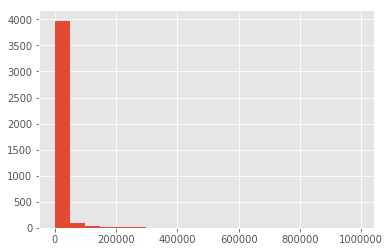

In [189]:
plt.hist(cust_mone['Ext-Price'],20)
plt.show()

# most customers contribute less than 200k sales for the company

(array([1.000e+00, 4.088e+03, 4.800e+01, 4.000e+00, 2.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([-104578.69823655,  -38897.2423904 ,   26784.21345576,
          92465.66930191,  158147.12514807,  223828.58099422,
         289510.03684038,  355191.49268653,  420872.94853269,
         486554.40437884,  552235.860225  ]),
 <a list of 10 Patch objects>)

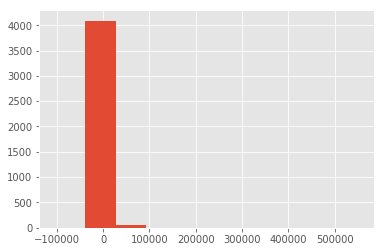

In [25]:
plt.hist(cust_mone['Profit'])
plt.show()

# most customers contribute less than 25k/100k profits to the company.
# about half customers have negative profits

In [ ]:
# Summury for RFM

In [34]:
rfm=SALES_DATA.groupby('CustomerID').agg({'Invoice Date': lambda x: (NOW - x.max()).days, 'InvoiceNo': lambda x: len(x), 'Ext-Price': lambda x: x.sum(), 'Profit': lambda x: x.sum()})
rfm['Invoice Date']=rfm['Invoice Date'].astype(int)
rfm.rename(columns={'Invoice Date': 'R', 
                    'InvoiceNo': 'F', 
                    'Ext-Price': 'M'}, inplace=True)
rfm['Count']=1

rfm.head(10)
rfm.info()

,R,F,M,Profit,Count
CustomerID,,,,,
12346,232,2,750867.968067,-104578.698237,1
12347,21,221,22725.420699,1075.936525,1
12348,12,50,20105.756089,93.519579,1
12349,401,69,982.177517,136.478325,1
12350,148,33,1000.923780,-10.098201,1
12352,100,73,1861.937203,258.246166,1
12353,82,8,371.300180,75.877923,1
12354,69,105,18197.906313,5958.457907,1
12355,51,12,1793.544574,107.344492,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4146 entries, 12346 to 18287
Data columns (total 5 columns):
R         4146 non-null int32
F         4146 non-null int64
M         4146 non-null float64
Profit    4146 non-null float64
Count     4146 non-null int64
dtypes: float64(2), int32(1), int64(2)
memory usage: 178.1 KB


In [190]:
for i in rfm.index:
    if rfm.loc[i,'R']>120:
        rfm.loc[i,'Group']=1
    elif rfm.loc[i,'M']<50000 or rfm.loc[i,'F']<10:
        rfm.loc[i,'Group']=2
    else:
        rfm.loc[i,'Group']=3

(array([1987.,    0.,    0.,    0.,    0., 2003.,    0.,    0.,    0.,
         156.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

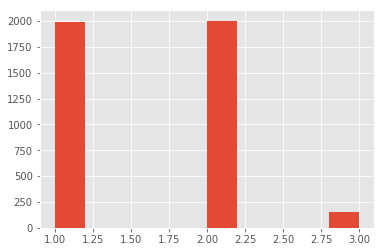

In [191]:
plt.hist(rfm['Group'])
plt.show()

In [192]:
rfm.info()
rfm.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4146 entries, 12346 to 18287
Data columns (total 8 columns):
R         4146 non-null int32
F         4146 non-null int64
M         4146 non-null float64
Profit    4146 non-null float64
Count     4146 non-null int64
Group     4146 non-null float64
M%        4146 non-null float64
P%        4146 non-null float64
dtypes: float64(5), int32(1), int64(2)
memory usage: 435.3 KB


,R,F,M,Profit,Count,Group,M%,P%
CustomerID,,,,,,,,
12346,232,2,750867.968067,-104578.698237,1,1.0,0.016374,-0.014113
12347,21,221,22725.420699,1075.936525,1,2.0,0.000496,0.000145
12348,12,50,20105.756089,93.519579,1,2.0,0.000438,0.000013
12349,401,69,982.177517,136.478325,1,1.0,0.000021,0.000018
12350,148,33,1000.923780,-10.098201,1,1.0,0.000022,-0.000001


In [193]:
rfm.groupby('Group')['Count','M','Profit'].aggregate('sum')

,Count,M,Profit
Group,,,
1.0,1987,5.876141e+06,1.064397e+06
2.0,2003,1.730964e+07,2.312731e+06
3.0,156,2.267085e+07,4.033095e+06


In [194]:
TM=rfm['M'].sum()
TP=rfm['Profit'].sum()

TM, TP

(45856636.90283652, 7410222.6012021415)

In [195]:
rfm['M%']=rfm['M']/TM
rfm['P%']=rfm['Profit']/TP

rfm.info()
rfm.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4146 entries, 12346 to 18287
Data columns (total 8 columns):
R         4146 non-null int32
F         4146 non-null int64
M         4146 non-null float64
Profit    4146 non-null float64
Count     4146 non-null int64
Group     4146 non-null float64
M%        4146 non-null float64
P%        4146 non-null float64
dtypes: float64(5), int32(1), int64(2)
memory usage: 435.3 KB


,R,F,M,Profit,Count,Group,M%,P%
CustomerID,,,,,,,,
12346,232,2,750867.968067,-104578.698237,1,1.0,0.016374,-0.014113
12347,21,221,22725.420699,1075.936525,1,2.0,0.000496,0.000145
12348,12,50,20105.756089,93.519579,1,2.0,0.000438,0.000013
12349,401,69,982.177517,136.478325,1,1.0,0.000021,0.000018
12350,148,33,1000.923780,-10.098201,1,1.0,0.000022,-0.000001


In [196]:
rfm.groupby('Group')['Count','M%','P%'].aggregate('sum')

,Count,M%,P%
Group,,,
1.0,1987,0.128142,0.143639
2.0,2003,0.377473,0.312100
3.0,156,0.494385,0.544261


In [ ]:
# Try GM%

In [200]:
rfgm=SALES_DATA.groupby('CustomerID').agg({'Invoice Date': lambda x: (NOW - x.max()).days, 'InvoiceNo': lambda x: len(x), 'Ext-Price': lambda x: x.sum(), 'Profit': lambda x: x.sum()})
rfgm['Invoice Date']=rfgm['Invoice Date'].astype(int)
rfgm.rename(columns={'Invoice Date': 'R', 
                    'InvoiceNo': 'F', 
                    'Ext-Price': 'M'}, inplace=True)

rfgm['GM%']=rfgm['Profit']/rfgm['M']
rfgm['Count']=1

rfgm.head(10)
rfgm.info()

,R,F,M,Profit,GM%,Count
CustomerID,,,,,,
12346,232,2,750867.968067,-104578.698237,-0.139277,1
12347,21,221,22725.420699,1075.936525,0.047345,1
12348,12,50,20105.756089,93.519579,0.004651,1
12349,401,69,982.177517,136.478325,0.138955,1
12350,148,33,1000.923780,-10.098201,-0.010089,1
12352,100,73,1861.937203,258.246166,0.138698,1
12353,82,8,371.300180,75.877923,0.204357,1
12354,69,105,18197.906313,5958.457907,0.327425,1
12355,51,12,1793.544574,107.344492,0.059850,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4146 entries, 12346 to 18287
Data columns (total 6 columns):
R         4146 non-null int32
F         4146 non-null int64
M         4146 non-null float64
Profit    4146 non-null float64
GM%       4146 non-null float64
Count     4146 non-null int64
dtypes: float64(3), int32(1), int64(2)
memory usage: 210.5 KB


(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 4.000e+00, 1.300e+01, 6.240e+02, 2.986e+03, 4.820e+02,
        2.700e+01, 7.000e+00]),
 array([-4.00585820e+00, -3.75556529e+00, -3.50527238e+00, -3.25497947e+00,
        -3.00468656e+00, -2.75439365e+00, -2.50410074e+00, -2.25380783e+00,
        -2.00351492e+00, -1.75322201e+00, -1.50292910e+00, -1.25263619e+00,
        -1.00234328e+00, -7.52050370e-01, -5.01757460e-01, -2.51464550e-01,
        -1.17164009e-03,  2.49121270e-01,  4.99414180e-01,  7.49707090e-01,
         1.00000000e+00]),
 <a list of 20 Patch objects>)

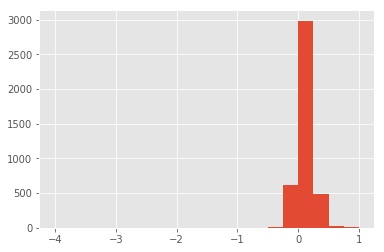

In [203]:
plt.hist(rfgm['GM%'],20)
plt.show()

In [217]:
for i in rfgm.index:
    if rfgm.loc[i,'R']>180:
        rfgm.loc[i,'Group']=1
    elif rfgm.loc[i,'GM%']<0.25 or rfgm.loc[i,'F']<5:
        rfgm.loc[i,'Group']=2
    else:
        rfgm.loc[i,'Group']=3

In [218]:
TMg=rfgm['M'].sum()
TPg=rfgm['Profit'].sum()

TMg, TPg

(45856636.90283652, 7410222.6012021415)

In [219]:
rfgm['M%']=rfgm['M']/TMg
rfgm['P%']=rfgm['Profit']/TPg

In [220]:
rfgm.groupby('Group')['Count','M','Profit','M%','P%'].aggregate('sum')

,Count,M,Profit,M%,P%
Group,,,,,
1.0,1651,4.245060e+06,7.556316e+05,0.092572,0.101972
2.0,2200,3.261532e+07,3.543785e+06,0.711245,0.478229
3.0,295,8.996261e+06,3.110806e+06,0.196182,0.419799


In [89]:
rfm.to_csv('RFM Segments_STU.csv',index=True)

In [ ]:
# ???
rfm['cha']=0 #champions
rfm['loc']=0 #loyal cust
rfm['plo']=0 #potential loyal
rfm['rec']=0 #recent cust
rfm['pro']=0 #promising
rfm['cna']=0 #cust needing attention
rfm['ats']=0 #about to sleep
rfm['rsk']=0 #at risk
rfm['clt']=0 #can't loose them
rfm['hnt']=0 #hibernating
rfm['lst']=0 #lost